In [ ]:
# Importar librerias

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def classical_particle_probability(self, x, V, T):
    """Classical particle probability.
    Args:
        x (float): position of the particle
        V (function): potential energy function
        T (float): temperature
    Returns:
        float: probability of the particle being at x"""
    beta = 1/T
    return np.exp(-beta*V(x))

In [ ]:
np.polynomial.hermite.Hermite(1)

In [ ]:
np.polynomial.hermite.hermval(1, [1, 1, 0])

In [1]:
# Quantum harmonic oscillator information

def potential(x):
    """Quamtum armonic oscillator potential
    
    Args:
        x (float): position of the particle
    Returns:
        float: value of the potential at x"""
    return 0.5*x**2

def energy(n):
    """Quamtum armonic oscillator energy
    
    Args:
        n (int): energy level
    Returns:
        float: value of the energy"""
    return n + 0.5

def wave_function(x, n):
    """Quamtum armonic oscillator wave function
    
    Args:
        x (float): position of the particle
        n (int): energy level
    Returns:
        float: value of the wave function at x"""
    arr = np.zeros(n+1)
    arr[n] = 1
    return (2**n*np.math.factorial(n)*np.sqrt(np.pi))**(-0.5)*np.exp(-0.5*x**2)*np.polynomial.hermite.hermval(x, arr)

def probability_density(x, n):
    """Quamtum armonic oscillator probability density
    
    Args:
        x (float): position of the particle
        n (int): energy level
    Returns:
        float: value of the probability density at x"""
    return wave_function(x, n)**2
    


In [2]:
import math 

def psi_n_sq(x, n):
    if n == -1:
        return 0.0
    else:
        psi = [math.exp(-x ** 2 / 2.0) / math.pi ** 0.25]
        psi.append(math.sqrt(2.0) * x * psi[0]) #save the wf's in a vector "psi"
        for k in range(2, n + 1):
            psi.append(math.sqrt(2.0 / k) * x * psi[k - 1] -
                       math.sqrt((k - 1.0) / k) * psi[k - 2]) #Hermite polynomial recursion relations
        return psi[n] ** 2

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [13]:
x = np.linspace(-4, 4, 10000)

In [14]:
a = [psi_n_sq(x_, i) for x_ in x]

In [15]:
b = probability_density(x, i)

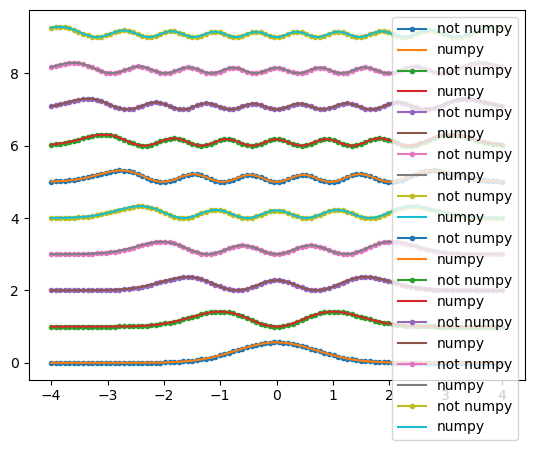

In [11]:
for i in range(0, 10):
    plt.plot(x, np.array([psi_n_sq(x_, i) for x_ in x]) + i, '.-', label = 'not numpy')
    plt.plot(x, probability_density(x, i) + i, label = 'numpy')
plt.legend()

In [ ]:
# Sampling:

def metropolis(x, delta, n, N_steps):
    """Metropolis algorithm
    Args:
        x (float): initial position
        delta (float): step size
        n (int): (energy level) quantum number
        probability (function): probability density function
        N_steps (int): number of steps
    Returns:
        xs: array of x values accepted"""
    xs = []
    for i in range(N_steps):
        x_new = x + np.random.uniform(-delta, delta)
        if np.random.uniform(0, 1) < probability_density(x_new, n)/probability_density(x, n):
            x = x_new
            xs.append(x)
    return np.array(xs)

def metropolis_with_energy_jumps(beta, N_steps, n=0, x=0, delta=0.1):
    """Energy jump algorithm
    Args:
        x (float): initial position
        m (int): number of steps
        n (int): (energy level) quantum number
        probability (function): probability density function
        N_steps (int): number of steps
    Returns:
        xs: array of x values accepted"""
    xs = []
    ns = []
    for i in range(N_steps):
        if x==0:
            x=1e-8 # to avoid division by zero
        m = n + np.random.choice([-1, 1])
        if m > 0 and np.random.uniform(0, 1) < ( (probability_density(x, m)/probability_density(x, n)) * np.exp( - beta * (energy(m) - energy(n)) ) ) :
            n = m
            ns.append(n)
        
        #for j in range(100):
        x_new = x + np.random.uniform(-delta, delta)
        if np.random.uniform(0, 1) < probability_density(x_new, n)/probability_density(x, n):
            x = x_new
            xs.append([x, n])
    
    return np.array(xs), np.array(ns)

In [ ]:
n_states = 4
grid_x = [i * 0.2 for i in range(-25, 26)]
psi = {}
for x in grid_x:

In [ ]:
x

In [ ]:
probability_density(10, 1)

In [ ]:
psi_0_sq(10)

In [ ]:
x = np.linspace(-5, 5, 100)

from math import pi, exp
def psi_0_sq(x):
    psi = exp(- x ** 2.0 / 2.0) / pi ** (1.0 / 4.0)
    return abs(psi) ** 2.0

plt.plot(x, )
plt.plot(x, )

In [ ]:
import random, math, pylab
from math import *

def psi_0_sq(x):
    psi = exp(- x ** 2.0 / 2.0) / pi ** (1.0 / 4.0)
    return abs(psi) ** 2.0

xx = 1e-10 # To avoid overflow
delta = 0.1
hist_data = []
for k in range(500000):
    x_new = xx + random.uniform(-delta, delta)
    if random.uniform(0.0, 1.0) < psi_0_sq(x_new) / psi_0_sq(xx): 
        xx = x_new 
        hist_data.append(xx)
    #print x
    
pylab.hist(hist_data, 500, density = True, label='Markov-chain sampling') #histogram of the sample
x = [a / 10.0 for a in range(-30, 30)]
y = [psi_0_sq(a) for a in x]
pylab.plot(x, y, c='red', linewidth=2.0, label='Exact quantum')
pylab.title('Position distribution at $T=0$', fontsize = 13)
pylab.xlabel('$x$', fontsize = 15)
pylab.ylabel('$\pi(x)=|\psi_0(x)|^2$', fontsize = 15)
pylab.legend()
#pylab.savefig('plot_T0_prob.png')
#pylab.show()

In [ ]:
np.random.seed(42)
xs_samples = metropolis(x=0.0, delta=0.1, n=0, N_steps=1000000)

In [ ]:
xs_grid = np.linspace(xs_samples.min(), xs_samples.max(), 100)
ys_grid = [probability_density(x, 0) for x in xs_grid]

plt.hist(xs_samples, 500, density = True, label='Metropolis sampling') #histogram of the sample
plt.plot(xs_grid, ys_grid, c='k', linewidth=2.0, label='Exact quantum')
plt.title('Position distribution at $T=0$', fontsize = 13)
plt.xlabel('x', fontsize = 15)
plt.ylabel('$\pi(x)=|\psi_0(x)|^2$', fontsize = 15)
plt.legend()

In [ ]:
xs, ns = metropolis_with_energy_jumps(beta=0.2, N_steps=1000000)

In [ ]:
def p_quant(x, beta):
    p_q = np.sqrt(np.tanh(beta/2.0)/np.pi) * np.exp(- x**2.0 * np.tanh(beta/2.0))
    return p_q

In [ ]:
xs_grid = np.linspace(xs[:, 0].min()-0.5, xs[:, 0].max()+0.5, 100)
plt.plot(xs_grid, p_quant(xs_grid, 0.2), c='k', linewidth=2.0, label='Exact quantum')
plt.hist(xs[:, 0], bins=300, density=True);

In [ ]:
plt.hist(xns[:, 1], bins=300, density=True);

In [ ]:
import random, math, pylab
from math import *

# Energy eigenstates of the harmonic oscillator
def psi_n_sq(x, n):
    if n == -1:
        return 0.0
    else:
        psi = [math.exp(-x ** 2 / 2.0) / math.pi ** 0.25]
        psi.append(math.sqrt(2.0) * x * psi[0]) #save the wf's in a vector "psi"
        for k in range(2, n + 1):
            psi.append(math.sqrt(2.0 / k) * x * psi[k - 1] -
                       math.sqrt((k - 1.0) / k) * psi[k - 2]) #Hermite polynomial recursion relations
        return psi[n] ** 2
    
# Energy eigenvalues of the harmonic oscillator
def E(n):
    E = n + 1.0 / 2.0 
    return E


# Markov-chain Monte Carlo algorithm:
def markov_prob(beta, n_trials):
    # Energy move:
    xx = 0.0
    delta = 0.1
    n = 0
    hist_data_n = []
    hist_data_x = []
    for l in range(100000):
        if xx == 0.0:
            xx += 0.00001 #avoid division by 0
        m = n + random.choice([1,-1]) #take a random energy step
        if m >= 0 and random.uniform(0.0, 1.0) \
                        < psi_n_sq(xx, m) / psi_n_sq(xx, n) * exp(-beta * (E(m) - E(n))): 
            n = m
            hist_data_n.append(n)   
        # Position move:
        x_new = xx + random.uniform(-delta, delta) #take a random position step
        if random.uniform(0.0, 1.0) < psi_n_sq(x_new, n) / psi_n_sq(xx, n): 
            xx = x_new 
            hist_data_x.append(xx)  
    return hist_data_x, hist_data_n
    
#Exact quantum position distribution
def p_quant(x, beta):
    p_q = sqrt(tanh(beta / 2.0) / pi) * exp(- x**2.0 * tanh(beta / 2.0))
    return p_q    
        
#Exact classical position distribution
def p_class(x, beta):
    p_c = sqrt(beta / (2.0 * pi)) * exp(- beta * x**2.0 / 2.0)
    return p_c

#Run the algorithm for different values of temperature:
n_trials = 10000
for beta in [0.2]:#, 1.0, 5.0]:
    B = beta
    T = 1 / beta
    hist_data_x, hist_data_n = markov_prob(beta, n_trials)
    pylab.hist(hist_data_x, 500, density = True, label='Markov-chain sampling') #position histogram of the sample
    x = [a / 10.0 for a in range(-100, 100)]
    y1 = [p_quant(a, beta) for a in x]
    y2 = [p_class(a, beta) for a in x]
    pylab.plot(x, y1, c='red', linewidth=4.0, label='exact quantum')
    pylab.plot(x, y2, c='green', linewidth=2.0, label='exact classical')
    pylab.title('Position distribution at $T=$%.2f' % T, fontsize = 13)
    pylab.xlabel('$x$', fontsize = 15)
    pylab.ylabel('$\pi(x)=e^{-\\beta E_n}|\psi_n(x)|^2$', fontsize = 15)
    pylab.xlim([-7,7])
    pylab.legend()
    pylab.savefig('plot_T_%.2f_prob.png' % T)
    pylab.show()

    pylab.hist(hist_data_n, 100, density = True) #energy histogram of the sample
    pylab.title('Energy distribution at $T=$%.2f' % T, fontsize = 13)
    pylab.xlabel('$n$', fontsize = 15)
    pylab.ylabel('$\pi(n)$', fontsize = 15)
    pylab.legend()
    pylab.grid()
    pylab.savefig('plot_T_%.2f_energy.png' % T)
    pylab.show()